In [230]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Impute
from sklearn.impute import SimpleImputer

#Decomposition
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

#CrossVal
from sklearn.model_selection import cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

#Deeplearning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [231]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [232]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [233]:
df=df.drop('customerID',axis=1)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [235]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [236]:
le=LabelEncoder()

In [237]:
df['gender']=le.fit_transform(df['gender'])

In [238]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [239]:
df['Partner']=le.fit_transform(df['Partner'])

In [240]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [241]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [242]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [243]:
df['PhoneService']=le.fit_transform(df['PhoneService'])

In [244]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [245]:
df['MultipleLines']=df['MultipleLines'].replace('No phone service','No')

In [246]:
df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [247]:
df['MultipleLines']=le.fit_transform(df['MultipleLines'])

In [248]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [249]:
df['InternetService']=df['InternetService'].replace(['Fiber optic','DSL'],'Yes')

In [250]:
df['InternetService'].value_counts()

Yes    5517
No     1526
Name: InternetService, dtype: int64

In [251]:
df['InternetService']=le.fit_transform(df['InternetService'])

In [252]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [253]:
df['OnlineSecurity']=df['OnlineSecurity'].replace('No internet service','No')

In [254]:
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])

In [255]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [256]:
df['OnlineBackup']=df['OnlineBackup'].replace('No internet service','No')

In [257]:
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])

In [258]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [259]:
df['DeviceProtection']=df['DeviceProtection'].replace('No internet service','No')

In [260]:
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])

In [261]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [262]:
df['TechSupport']=df['TechSupport'].replace('No internet service','No')

In [263]:
df['TechSupport']=le.fit_transform(df['TechSupport'])

In [264]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [265]:
df['StreamingTV']=df['StreamingTV'].replace('No internet service','No')

In [266]:
df['StreamingTV']=le.fit_transform(df['StreamingTV'])

In [267]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [268]:
df=df.replace('No internet service','No')

In [269]:
df['StreamingMovies'].value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

In [270]:
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])

In [271]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [272]:
df['Contract']=le.fit_transform(df['Contract'])

In [273]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [274]:
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])

In [275]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [276]:
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

In [277]:
df=df[df['TotalCharges']!=' ']

In [278]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x : float(x))

In [279]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [280]:
df['Churn']=le.fit_transform(df['Churn'])

In [281]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


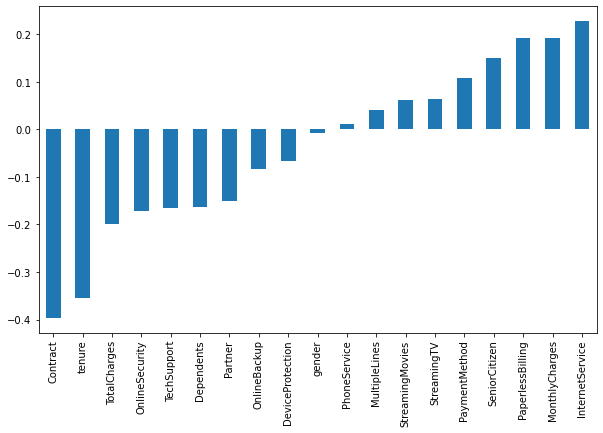

In [283]:
plt.figure(figsize=(10,6))
df.corr()['Churn'].sort_values().drop('Churn').plot(kind='bar')
plt.show()

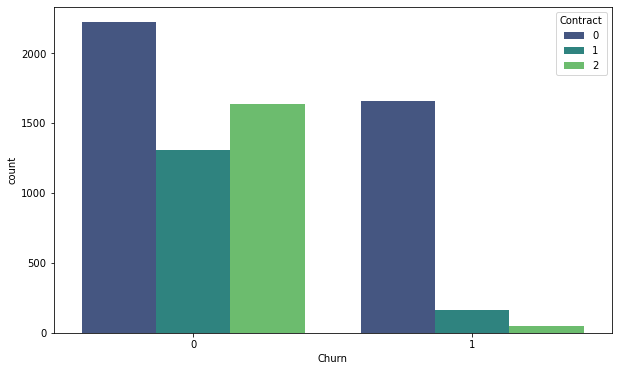

In [284]:
plt.figure(figsize=(10,6))
sns.countplot(x='Churn',data=df,hue='Contract',palette='viridis')
plt.show()

In [285]:
df.shape

(7032, 20)

In [286]:
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [287]:
df.shape

(6352, 20)

In [288]:
scale=MinMaxScaler()

In [289]:
# scale=StandardScaler()

In [290]:
df.skew()

gender             -0.013858
SeniorCitizen       1.821088
Partner             0.057973
Dependents          0.881771
tenure              0.236305
PhoneService        0.000000
MultipleLines       0.131929
InternetService    -1.222384
OnlineSecurity      1.019404
OnlineBackup        0.691051
DeviceProtection    0.709028
TechSupport         1.002570
StreamingTV         0.490275
StreamingMovies     0.481352
Contract            0.633437
PaperlessBilling   -0.388846
PaymentMethod      -0.168578
MonthlyCharges     -0.400997
TotalCharges        0.898862
Churn               1.050872
dtype: float64

In [291]:
pt=PowerTransformer()

In [292]:
for x in df.columns.drop('Churn'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]:pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [293]:
df.skew()

gender             -0.013858
SeniorCitizen       1.821088
Partner             0.057973
Dependents          0.881771
tenure              0.236305
PhoneService        0.000000
MultipleLines       0.131929
InternetService    -1.222384
OnlineSecurity      1.019404
OnlineBackup        0.691051
DeviceProtection    0.709028
TechSupport         1.002570
StreamingTV         0.490275
StreamingMovies     0.481352
Contract            0.633437
PaperlessBilling   -0.388846
PaymentMethod      -0.168578
MonthlyCharges     -0.400997
TotalCharges        0.898862
Churn               1.050872
dtype: float64

In [294]:
# for x in df.columns:
#     if df.corr()['Churn'][x]<0.1:
#         df=df.drop(x,axis=1)

In [295]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [296]:
X=scale.fit_transform(X)

In [315]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        acc=accuracy_score(y_test,predict)
#         f1=f1_score(y_test,predict)
#         avg=(confusion_matrix(y_test,predict)[0,0]+confusion_matrix(y_test,predict)[1,1])/(confusion_matrix(y_test,predict)[0,1]+confusion_matrix(y_test,predict)[1,0])
        if acc>max_score:
            max_score=acc
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [298]:
#Call the function
model_select(LogisticRegression(max_iter=2000))

Max score is 0.8236775818639799 with random state 92


In [299]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 0.7707808564231738 with random state 45


In [300]:
#Call the function
model_select(SVC())

Max score is 0.8192695214105793 with random state 92


In [301]:
#Call the function
model_select(DecisionTreeClassifier())

Max score is 0.760705289672544 with random state 88


In [302]:
#Call the function
model_select(RandomForestClassifier())

Max score is 0.8161209068010076 with random state 92


In [303]:
#Call the function
model_select(AdaBoostClassifier())

Max score is 0.8261964735516373 with random state 55


In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=92)

In [317]:
param={'n_estimators':[100,130,150,170,190,210,230,250,270,290,310,330,350,370]}
gscv=GridSearchCV(RandomForestClassifier(),param)

In [318]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 130, 150, 170, 190, 210, 230,
                                          250, 270, 290, 310, 330, 350, 370]})

In [319]:
gscv.best_params_

{'n_estimators': 210}

In [321]:
rf=RandomForestClassifier(n_estimators=210)

In [322]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=210)

In [323]:
predict=rf.predict(X_test)

In [324]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[1070  110]
 [ 194  214]]

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1180
           1       0.66      0.52      0.58       408

    accuracy                           0.81      1588
   macro avg       0.75      0.72      0.73      1588
weighted avg       0.80      0.81      0.80      1588



In [325]:
pc=PCA(n_components=4)

In [326]:
X=pc.fit_transform(X)

In [328]:
#Call the function
model_select(LogisticRegression(max_iter=2000))

Max score is 0.8022670025188917 with random state 62


In [329]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 0.7827455919395466 with random state 62


In [330]:
#Call the function
model_select(SVC())

Max score is 0.7978589420654912 with random state 92


In [331]:
#Call the function
model_select(DecisionTreeClassifier())

Max score is 0.7304785894206549 with random state 62


In [332]:
#Call the function
model_select(RandomForestClassifier())

Max score is 0.7802267002518891 with random state 92


In [333]:
#We tried to implement PCA but it doesn't seem to work well
#So we will stick to our original data

In [335]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [336]:
X=scale.fit_transform(X)

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=92)

In [338]:
rf=RandomForestClassifier(n_estimators=210)

In [339]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=210)

In [340]:
predict=rf.predict(X_test)

In [341]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[1068  112]
 [ 189  219]]

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1180
           1       0.66      0.54      0.59       408

    accuracy                           0.81      1588
   macro avg       0.76      0.72      0.73      1588
weighted avg       0.80      0.81      0.80      1588



In [343]:
#Save the model
joblib.dump(rf,'Telecom Churn rf.obj')

['Telecom Churn rf.obj']